<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

# Lab 8: Optimization Methods (Gradient Descent)
In this lab, we implement gradient descent and use it to minimze the different types of function, from simple polynomials to a Gaussian model fitted to real data. We explore the different starting points, step size and the shape of the cost function and how they affect where the optimizer ends up (local vs global minima)

</span>

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 1: Cubic Model
In this experiment, we use gradient descent to find the minimum of a cubic function `f(x) = x^3 - 3x^2 - 144x + 432` by first plotting the function and its numerical derivative over a range of x-values to see where the extrema are. We then create a simple objective function class with a `cost` method, plug it into our `Optimizer`, start from `x = 0` and use the optimizer's result to mark and connect the starting point to the found minimum on the plot. 

</span>

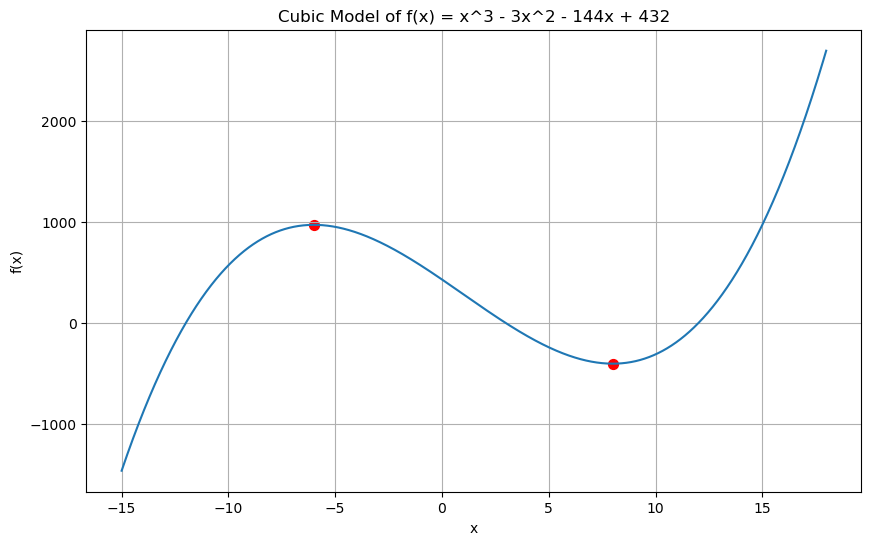

In [1]:

"""

    - plot the cost function with bounds of -15 to 18 with a step size of 0.01, observe the shape and find the critical points

"""

# importing libraries
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-15, 18, 0.01)
f = x**3 - 3*x**2 - 144*x + 432

# find critical points
critical_points = np.roots([3, -6, -144])

# find the y values
y_values = [cp**3 - 3*cp**2 - 144*cp + 432 for cp in critical_points]

# plotting the figures
plt.figure(figsize=(10, 6))
plt.scatter(critical_points, y_values, color="red", s=50)
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Cubic Model of f(x) = x^3 - 3x^2 - 144x + 432")
plt.grid(True)
plt.show()



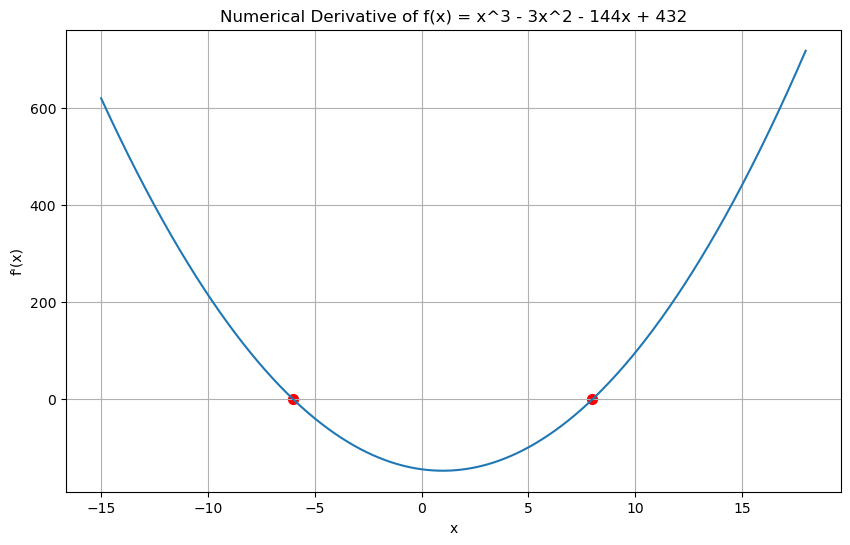

In [2]:

""" 

    - plot the numerical derivative of the cubic model with the same bounds and same step size
        - search through numerical derivative to find first 2 points that are equal or closest to zero

"""

dx = x[1] - x[0]
f_prime = np.diff(f) / dx
x_prime = x[:-1]    # drop the last x-value

# find the smallest derivatives
abs_derivative = np.abs(f_prime)
indices = abs_derivative.argsort()[:2]
closest_points = x_prime[indices]
deriv_y_values = f_prime[indices]

# plotting code
plt.figure(figsize=(10, 6))
plt.plot(x_prime, f_prime)
plt.scatter(closest_points, deriv_y_values, color="red", s=50)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Numerical Derivative of f(x) = x^3 - 3x^2 - 144x + 432")
plt.grid(True)
plt.show()





In [3]:

""" 

    - create a new objective function class, which should implement the given objective function in a method called cost

    - import the optim classes, create an object and supply the cost function. We use the following hyperparameters:
        - step_size = 0.01 & max_iter = 100 & tol = 1e-5 & delta = 1e-4

"""

# importing libraries
import sys
sys.path.append("code")

from optim import Optimizer

class ObjectiveFunction:

    def cost(self, x):
        x = x[0] 
        return x**3 - 3*x**2 - 144*x + 432

# creating an object using the imported class
optim = Optimizer(0.01, 100, 1e-5, 1e-4)

# creating a object using the class made in this cell
objective = ObjectiveFunction()

# the starting point of 0.0
starting_params = np.array([0.0])

# the parameters that optimize and number of iterations
best_params, iters = optim.optimize(objective, starting_params)
print("Minimum: ", best_params)
print("Iterations: ", iters)



Minimum:  [7.99993677]
Iterations:  27


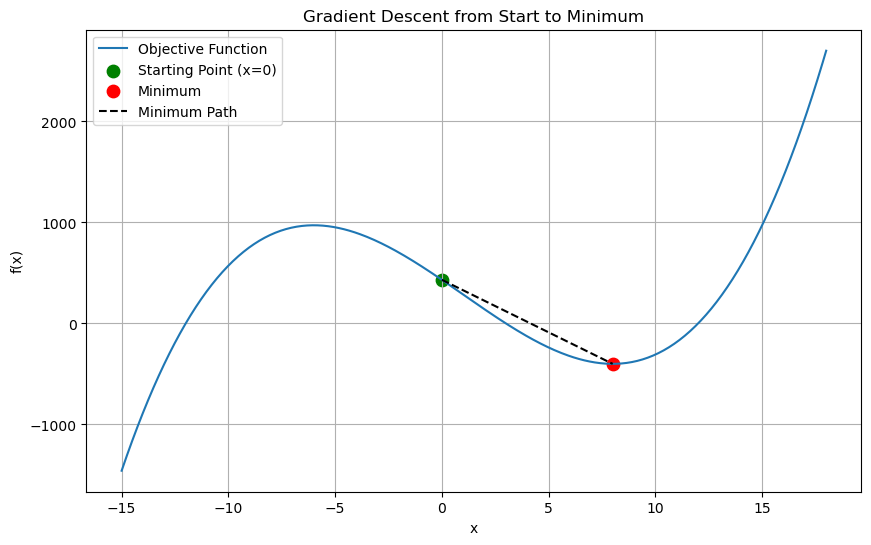

In [4]:

""" 

    - use a starting point of 0, solve for minimum using the optimizer
        - plot a line from the starting point to the minima on the objective function plot

"""

# array to just a number
xmin = best_params[0]

x_start = 0
y_start = objective.cost([x_start])
y_minimum = objective.cost([xmin])

x_values = np.linspace(-15, 18, 400)
y_values = [objective.cost([x]) for x in x_values]

# plot the lines & dots
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Objective Function")
plt.scatter(x_start, y_start, color="green", s=80, label="Starting Point (x=0)")
plt.scatter(xmin, y_minimum, color="red", s=80, label="Minimum")
plt.plot([x_start, xmin], [y_start, y_minimum], color="black", linestyle="--", label="Minimum Path")

# plotting labels
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent from Start to Minimum")
plt.legend()
plt.grid(True)

# displaying the plot
plt.show()




<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 2: Quartic Model
We now plot the quartic function `f(x) = 3*x**4 - 16*x**3 - 18*x**2` over the range -3 to 6.75 and identify the extrema. We then plot the numerical derivative to find the first three points closest to zero. We create a objective function class, use the optimizer with hyperparameters and from the starting points `x = 6, 3, -2` to find the minima and draw lines from each starting point to its corresponding minimum on the function plot. 
</span>

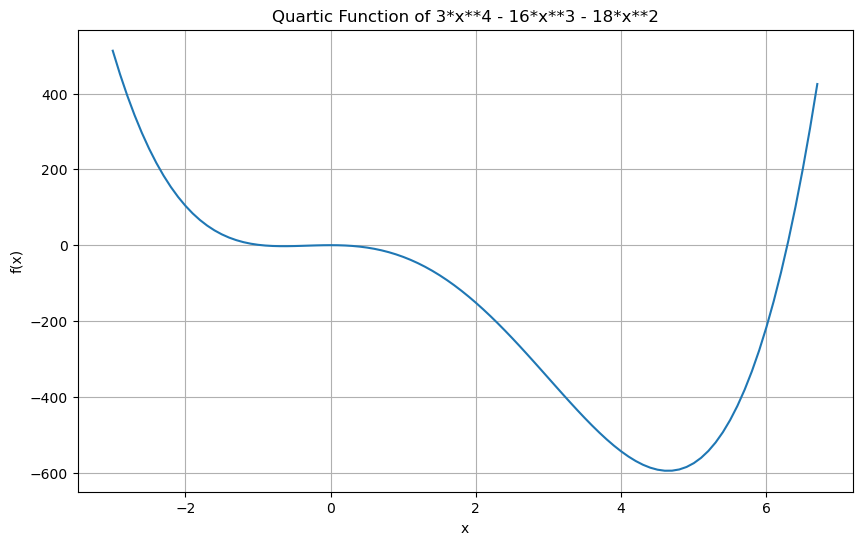

In [5]:

""" 

    - plot the cost function with the bounds of -3 to 6.75 with a step size of 0.1
        - observe the shape of the function and at what values of x the function has extrema
        
"""

x = np.arange(-3, 6.75, 0.1)
f = 3*x**4 - 16*x**3 - 18*x**2

plt.figure(figsize=(10, 6))
plt.plot(x, f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Quartic Function of 3*x**4 - 16*x**3 - 18*x**2")
plt.grid(True)
plt.show()


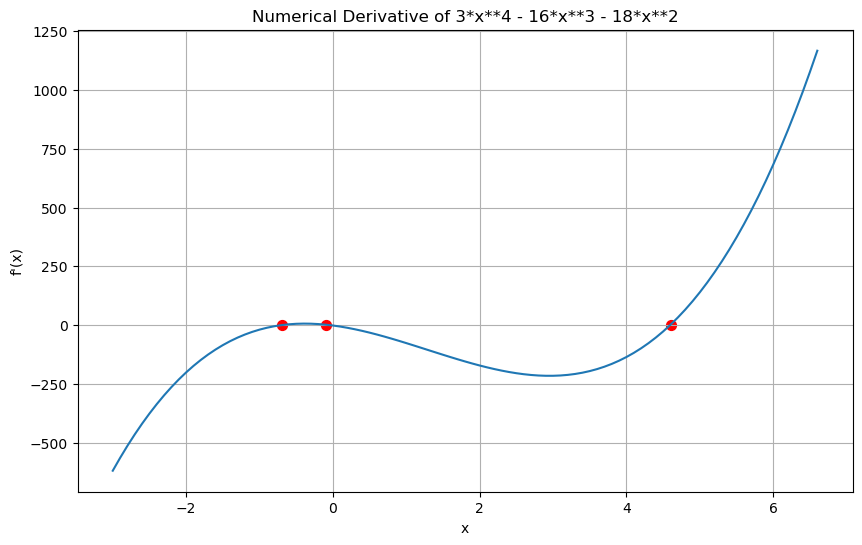

In [7]:

"""

    - plot the numerical derivative of the quartic model within the same bounds and step size
        - solve for the first 3 points of the derivative that are equal / closest to 0

"""

dx = x[1] - x[0]
f_prime = np.diff(f) / dx
x_prime = x[:-1]    # drop the last x-value

# find the smallest derivatives
abs_derivative = np.abs(f_prime)
indices = abs_derivative.argsort()[:3]
closest_points = x_prime[indices]
deriv_y_values = f_prime[indices]

# plotting code
plt.figure(figsize=(10, 6))
plt.plot(x_prime, f_prime)
plt.scatter(closest_points, deriv_y_values, color="red", s=50)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Numerical Derivative of 3*x**4 - 16*x**3 - 18*x**2")
plt.grid(True)
plt.show()



In [9]:

""" 

    - create a new objective function class, which should implement the given objective function in a method called cost

    - import the optim classes, create an object and supply the cost function. We use the following hyperparameters:
        - step_size = 0.001 & max_iter = 1000 & tol = 1e-5 & delta = 1e-4

"""


from optim import Optimizer

class ObjectiveFunction:

    def cost(self, x):
        x = x[0] 
        return 3*x**4 - 16*x**3 - 18*x**2

# creating an object using the imported class
optim = Optimizer(0.001, 1000, 1e-5, 1e-4)

# creating a object using the class made in this cell
objective = ObjectiveFunction()

# the starting point of 0.0
starting_params = np.array([0.0])

# the parameters that optimize and number of iterations
best_params, iters = optim.optimize(objective, starting_params)
print("Minimum: ", best_params)
print("Iterations: ", iters)


Minimum:  [1.80016e-06]
Iterations:  1


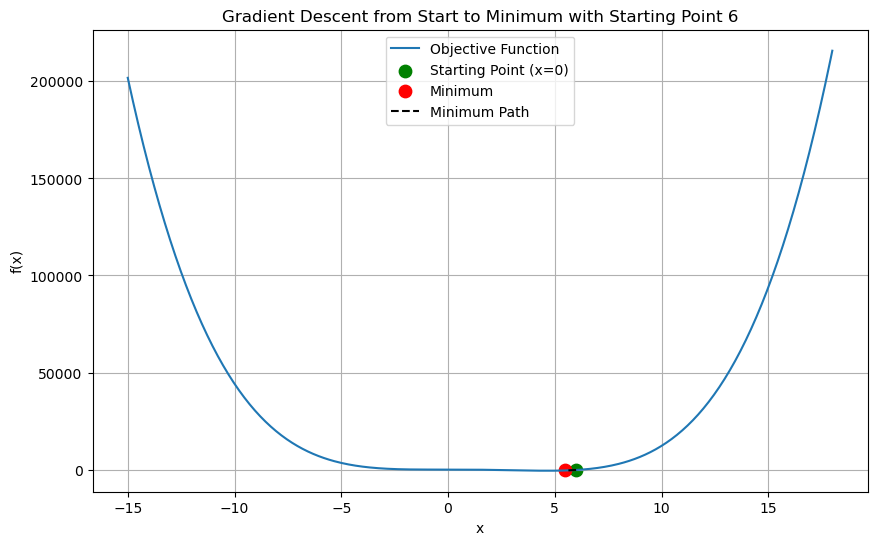

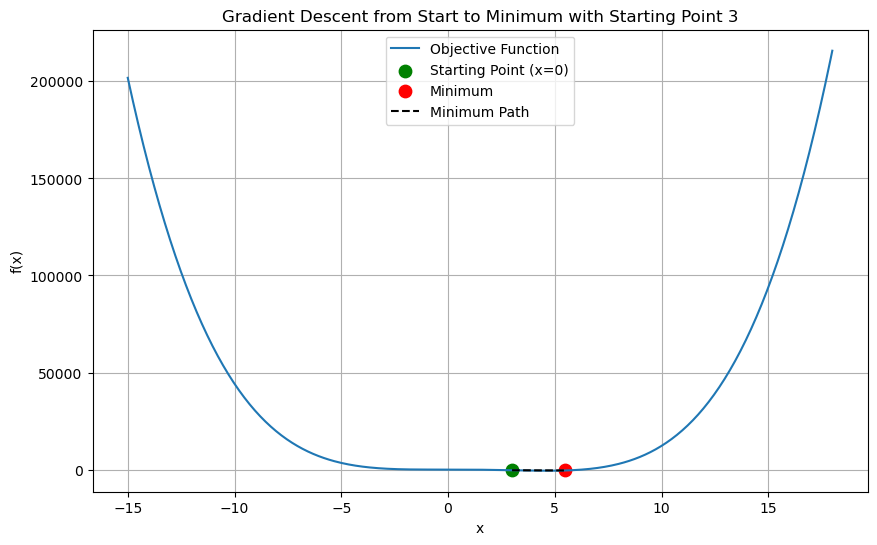

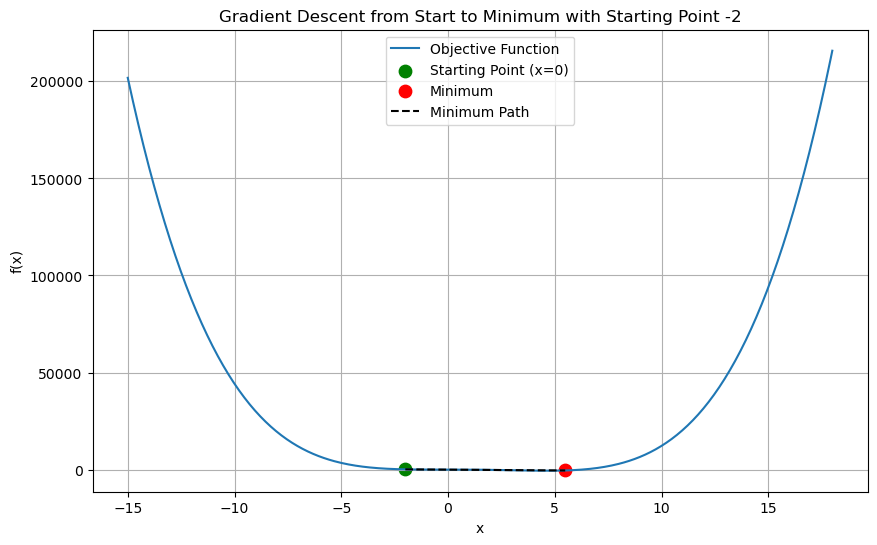

In [27]:


""" 

    - use a starting point of 0, solve for minimum using the optimizer
        - plot a line from the starting point to the minima on the objective function plot

"""

# array to just a number
xmin = best_params[0]

x_start_list = [6, 3, -2]

for x_start in x_start_list:

    y_start = objective.cost([x_start])
    y_minimum = objective.cost([xmin])

    x_values = np.linspace(-15, 18, 400)
    y_values = [objective.cost([x]) for x in x_values]

    # plot the lines & dots
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label="Objective Function")
    plt.scatter(x_start, y_start, color="green", s=80, label="Starting Point (x=0)")
    plt.scatter(xmin, y_minimum, color="red", s=80, label="Minimum")
    plt.plot([x_start, xmin], [y_start, y_minimum], color="black", linestyle="--", label="Minimum Path")

    # plotting labels
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Gradient Descent from Start to Minimum with Starting Point {x_start}")
    plt.legend()
    plt.grid(True)

    # displaying the plot
    plt.show()

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 3: Gaussian Model
We will now load a Gaussian cost function and the `gaussdist.csv` dataset. We then use the optimizer to find the μ and σ values that make the Gaussia curve fit the data as closely as possible. We plot the data, the initial Gaussian guess, optimized Gaussian and report the error before and after the optimization.

</span>

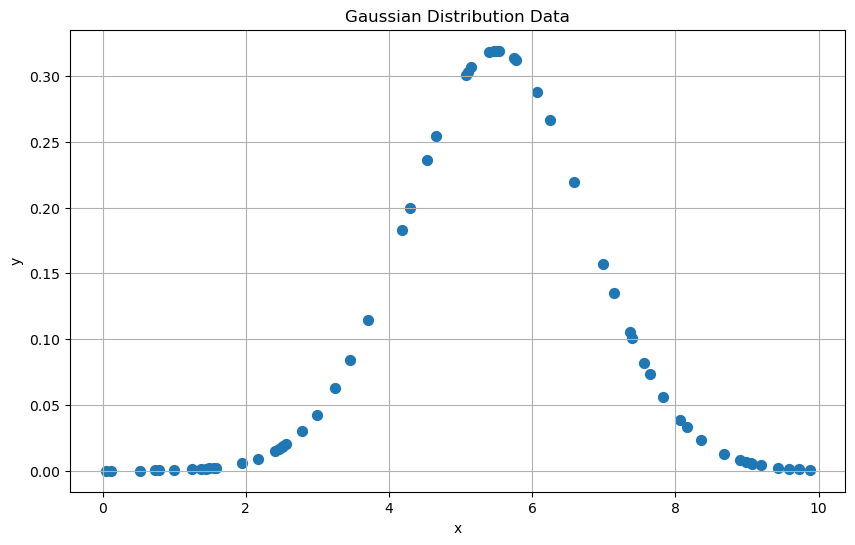

In [22]:

""" 

    - import the gaussian distribution cost function and instantiate it with the gaussdist.csv dataset

    - plot the data, initial model predictions, solved model predictions
        - include in the plot original error and error after using optimizer

"""

import pandas as pd
from cost_functions import GaussianCostFunction

# import csv as dataframe
gauss_df = pd.read_csv("data/gaussdist.csv", header=None, names=["x", "y"])

# extract features and target variable
X = gauss_df[["x"]].values.astype(float)
y = gauss_df["y"].values.astype(float)

# creating the gaussian cost function object
gaussObj = GaussianCostFunction(features=X, y_true=y)

# the gaussian function
def gaussian(x, mu, sigma):
    equation = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu)/sigma)**2)
    return equation

# plotting the data 
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50)
plt.title("Gaussian Distribution Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


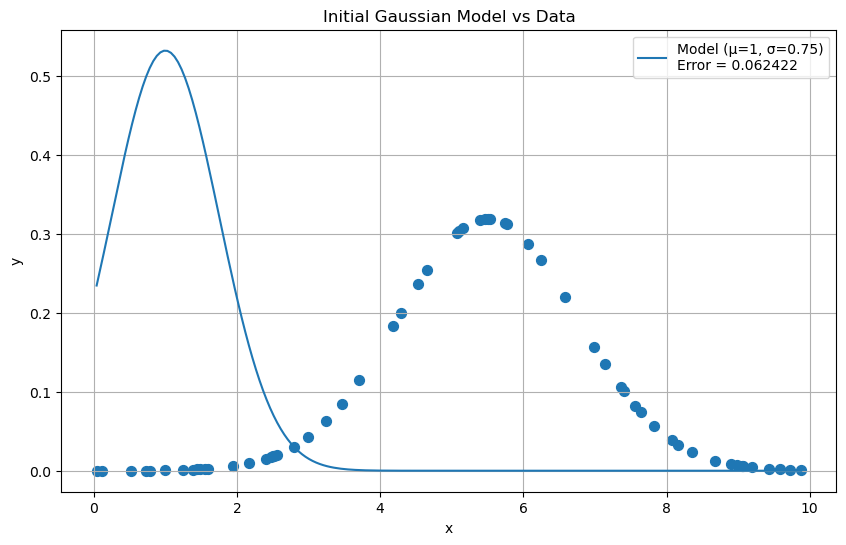

In [23]:

""" 

    - plot the data, initial model predictions, solved model predictions
        - include in the plot original error and error after using optimizer

"""

mu0 = 1
sigma0 = 0.75

x_line = np.linspace(min(X)[0], max(X)[0], 200)
y_init = gaussian(x_line, mu0, sigma0)

# the initial error
initial_error = gaussObj.cost([mu0, sigma0])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50)
plt.plot(x_line, y_init, label=f"Model (μ=1, σ=0.75)\nError = {initial_error:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial Gaussian Model vs Data")
plt.legend()
plt.grid(True)
plt.show()



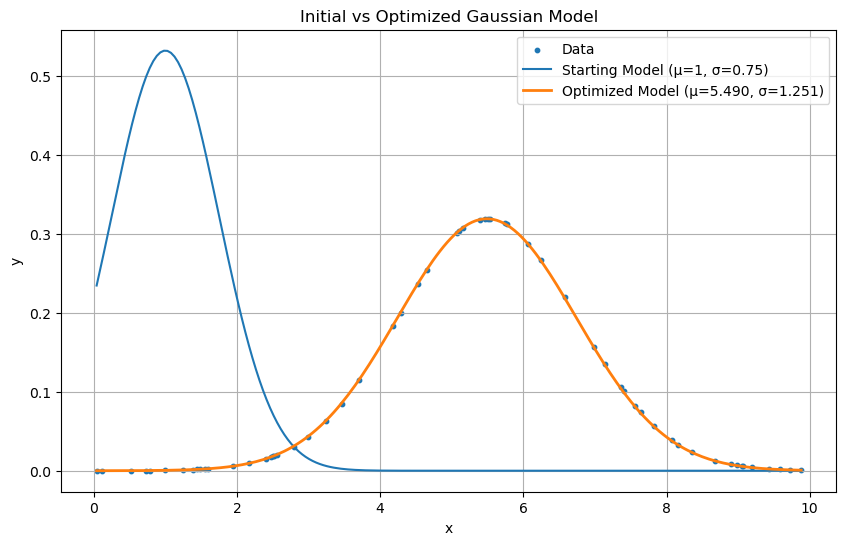

In [ ]:

""" 

    - plot the data, initial model predictions, solved model predictions
        - include in the plot original error and error after using optimizer

"""

optim = Optimizer(step_size=1, max_iter=5000, tol=1e-4, delta=1e-3)

# starting off with the initial model
start_params = np.array([mu0, sigma0])

# the best parameters of mu and sigma
best_params, iters = optim.optimize(gaussObj, start_params)
mu_opt, sigma_opt = best_params

# plotting with the optimizer
y_opt = gaussian(x_line, mu_opt, sigma_opt)
final_error = gaussObj.cost(best_params)

# plotting code
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=10, label="Data")
plt.plot(x_line, y_init, label=f"Starting Model (μ=1, σ=0.75)")
plt.plot(x_line, y_opt, label=f"Optimized Model (μ={mu_opt:.3f}, σ={sigma_opt:.3f})", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial vs Optimized Gaussian Model")
plt.legend()
plt.grid(True)
plt.show()


<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Questions 

**Question:** Reflect on the form and organization of our optimizer API. Specifically, discuss each of the methods and what role they serve. This discussion should include what arguments they accept, what the method returns, and why we might choose to separate out these specific methods into helper methods.

The optimizer class consists of a constructor method as well as a number of helper methods. Each method has its own responsibility that will be detailed in the bullets below. 

- `def __init__(self, step_size, max_iter, tol, delta):` initializes the optimizer with the hyperparameters that control behavior of gradient descent.
- `def optimize(self, cost_func, starting_params):` runs a iterative loop that performs gradient descent until found and returns a tuple and returns a vector containing the gradient with respect to each parameter.
- `def _calculate_change(self, old, new):` computes the distance between old and new parameter vectors, used as stopping condition and returns a scalar value representing how much the parameters changed
- `def _gradient(self, cost_func, params):` compues the numerical gradient of the cost function at the given parameters and returns a vector containing the gradient with respect to each parameter.
- `def _update(self, param, gradient):` applies the gradient descent update rule and returns a new parameter vector.


### Experiment 1
- **Question i:** How many optima did you find?
  
The cubic function in experiment 1, the derivative was equal to zero at two points. This means the function has two optima, which is one local maximum and one local minimum.

- **Question ii:** When you used the optimizer you started at x = 0. How many optima did your optimizer return? Was it a minima or maxima? Was it a global or local optima? By looking at the gradient descent algorithm find what term pointed you toward the minimum. Describe how it did this. Can you think of a way to find the function’s maxima?

When we used the optimizer starting at x = 0, the optimizer returned only one optima, which was a local minima and also a global minimum. The optimizer found the minimum due to the update rule, which is `new_param = param - self.step_size * gradient `. The update rule works by having the negative sign which is what pushes the parameter in the direction where the function decreases, so we move downhill until the slope becomes close to zero, which is the point at which it stops. To find a function's maximum, we can use gradient ascent, where we change the minus to a plus. This would flip the optimizer so that it goes up instead of going down

### Experiment 2
- **Question i:** How many optima did you find?

In the cubic function, we found three critical points. We have two optima, where there is one local minimum and one local maximum. The other point is a saddle point, which is otherwise a inflection point.

- **Question ii:** Describe the different starting locations that you used to solve for optima. Was the found optima different for any of these starting locations and were they the global or local optima? If it was, can you explain why the optimizer found different solutions?

Using the three different starting points of x = 6, 3 and -2, the optimizer returned different optima. For x = 6, we got a local minimum, for x = 3, we have a saddle point and at x = -2, we have the global minimum. The optimizer found different solutions because gradient descent is sensitive to the starting point. It always moves downhill from where it begins, so it may converge to a local minimum instead of the global minimum if the initial guess is closer to that valley. 


### Experiment 3
- **Question i:** How many optima did you find?

With the gaussian model, the optimizer we had was solving for the parameters μ and σ which minimize the error between the Gaussian model and the dataset. Since a Gaussian likelihood function which is in terms of μ and σ is convex, this means there is only one minimum which is the global optimum. As a result, we have only found one optimum. 

- **Question ii:** Look back at the heatmaps you generated in Lab 06 for the gaussian distribution. Describe what the optimizer is doing using the heatmap visualization.

The heatmap from Lab 6 shows the error surface of the Gaussian model over a range of μ and σ values. Darker areas represent lower error (better fit) and lighter areas represent higher error (worse fit). When we were using the optimizer, it starts with a initial provided value for μ and σ. The optimizer then moves downhill on the heatmap, following the gradient towards the region of lower error. Each update step brings the parameters closer to the darkest region, which is the global minimum (the best μ and σ values). In a nutshell, the heatmap visualizes how gradient descent navigates the error surface to find the optimal parameters.
